#Analisis Exploratorio de Netflix

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/gdrive')

ruta = "/gdrive/MyDrive/mineria/NetflixOriginals_cleaned.csv"
data = pd.read_csv(ruta)

Mounted at /gdrive


In [3]:
print(data.shape)
data.head()

(579, 6)


,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,08-05-19,58,2.5,English/Japanese
1,Dark Forces,thriller,"August 21, 2020",81,2.6,ESP
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [4]:
data.info

<bound method DataFrame.info of                                            Title                  Genre  \
0                                Enter the Anime            Documentary   
1                                    Dark Forces               thriller   
2                                        The App  Science fiction/Drama   
3                                 The Open House        Horror thriller   
4                                    Kaali Khuhi                Mystery   
..                                           ...                    ...   
574        Taylor Swift: Reputation Stadium Tour           Concert Film   
575  Winter on Fire: Ukraine's Fight for Freedom            Documentary   
576                      Springsteen on Broadway           One-man show   
577    Emicida: AmarElo - It's All For Yesterday            Documentary   
578     David Attenborough: A Life on Our Planet            Documentary   

              Premiere  Runtime  IMDB Score                  Langua

In [11]:
col_cat = ['Title', 'Genre', 'Premiere', 'Language']

# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(90,90))
fig.subplots_adjust(hspace=0.7)

for i, col in enumerate(col_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 150 (\x96) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


Data


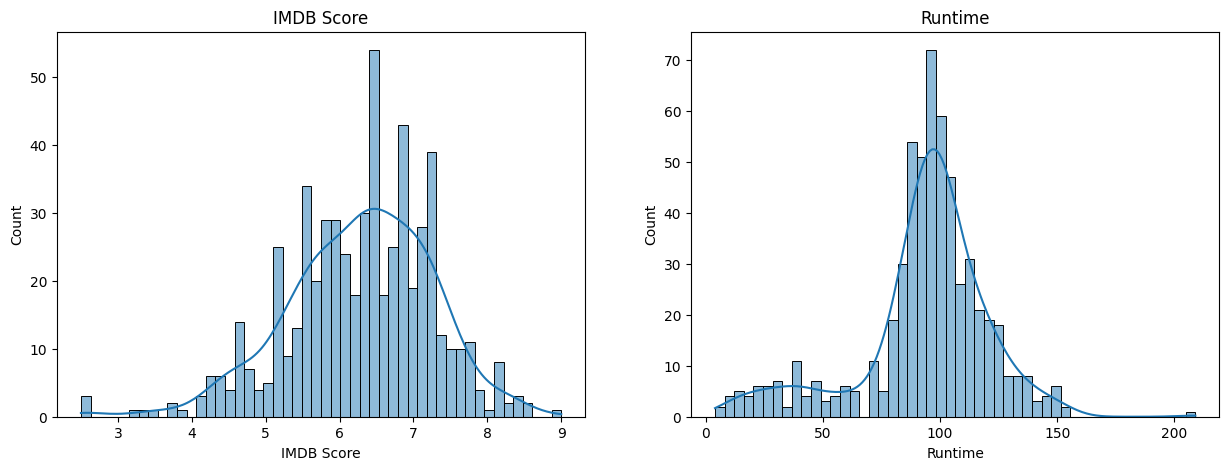

In [16]:
col_num = ["IMDB Score", "Runtime"]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if col == 'Genre':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=data, ax=ax[i], bins=nbins, kde = True)
    ax[i].set_title(col)

In [17]:
data["Runtime"].describe()

count    579.000000
mean      93.497409
std       27.846426
min        4.000000
25%       86.000000
50%       97.000000
75%      107.500000
max      209.000000
Name: Runtime, dtype: float64

#Observaciones
- El 75% de la audencia llego a ver 107 horas de peliculas 🎥
- Mientras que la mayoria de personas estan en un rago de 4 y 93 horas

In [18]:
data["IMDB Score"].describe()

count    579.000000
mean       6.274784
std        0.976765
min        2.500000
25%        5.700000
50%        6.400000
75%        7.000000
max        9.000000
Name: IMDB Score, dtype: float64

In [19]:
data["Genre"].describe()

count             579
unique            130
top       Documentary
freq              158
Name: Genre, dtype: object

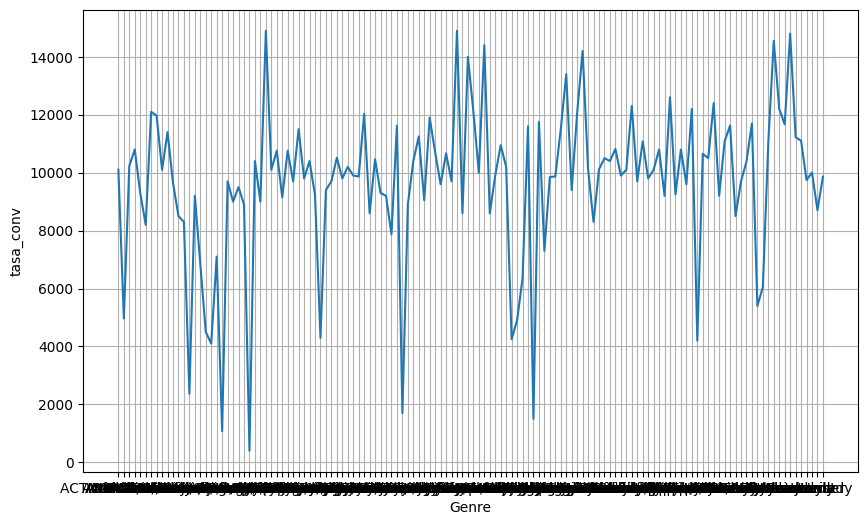

In [26]:
# Función para graficar tasas de conversión

def graficar_tasas_conversion(var_predictora, var_predecir, type='line', order=None):
    x, y = var_predictora, var_predecir

    # Generar agrupaciones (groupby), calcular tasa de conversión (mean),
    # multiplicarla por 100 (mul(100))
    grupo = data.groupby(x)[y].mean().mul(100).rename('tasa_conv').reset_index()

    # Y generar gráfica
    if type=='line': # Útil para rangos continuos
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()
    elif type=='bar': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(14,6))
        sns.barplot(x=var_predictora, y='tasa_conv', data=grupo, order=order)
        plt.grid()
    elif type=='scatter': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(10,6))
        sns.scatterplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()
graficar_tasas_conversion('Genre','Runtime')

In [41]:
def graficar_tc_bivariada(col_list, orden=None):
  tc = data.groupby(col_list)['Runtime'].mean().to_frame().reset_index()

  # Gráfica
  plt.figure(figsize=(13,7))
  ax = sns.pointplot(x=tc['Runtime'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False, order=orden)
  ax.yaxis.grid(True)
  ax.xaxis.grid(True)
  plt.title(f'Tasa de conversión para {col_list[0]} y {col_list[1]}')
  plt.xlabel('Tasa de conversión (%)')
  plt.xlim((0,1))